#Objetivo de la Práctica
El objetivo de esta práctica es que los estudiantes apliquen los conceptos de regresión
lineal simple y correlación a un conjunto de datos real. Los estudiantes deberán utilizar
Python para analizar los datos, calcular la correlación entre dos variables, ajustar un
modelo de regresión lineal, y visualizar los resultados obtenidos

Saving grupo1.csv to grupo1.csv
Coeficiente de correlación de Pearson: -0.0571
Valor p: 0.6935
Interpretación: Existe una relación débil y negativa entre las horas de estudio y las calificaciones.

Ecuación de regresión: Calificación = 85.31 + -0.11 * HorasEstudio
Coeficiente de determinación (R²): 0.0033


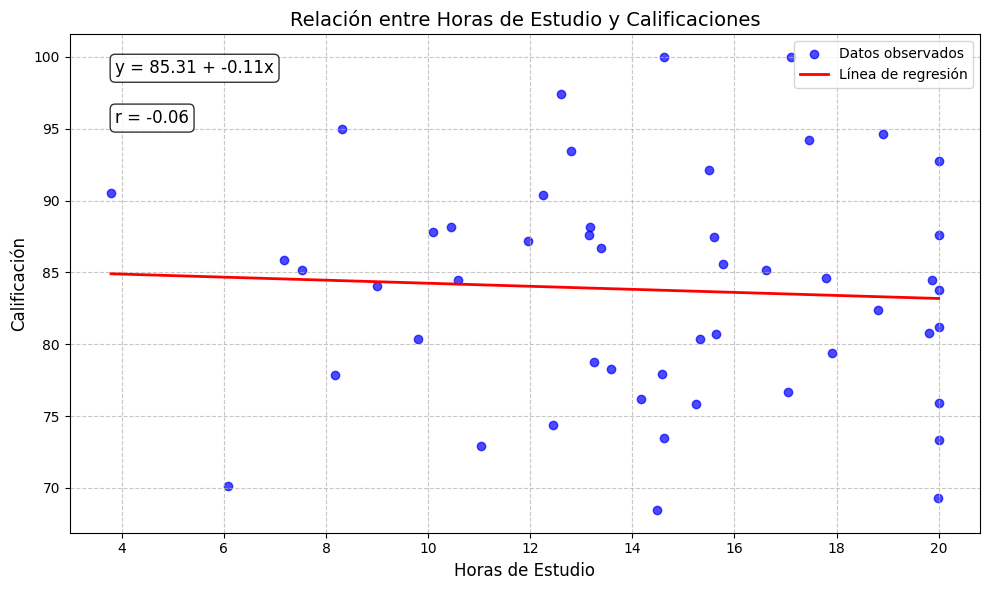

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

# Cargar los datos
from google.colab import files
uploaded = files.upload()

# Luego puedes leer el archivo así:
import io
data = pd.read_csv(io.BytesIO(uploaded['grupo1.csv']))


# Extraer las variables
X = data['HorasEstudio'].values.reshape(-1, 1)  # Variable independiente (horas de estudio)
y = data['Calificacion'].values                # Variable dependiente (calificación)

# 1. Calcular el coeficiente de correlación de Pearson
corr_coef, p_value = stats.pearsonr(data['HorasEstudio'], data['Calificacion'])
print(f"Coeficiente de correlación de Pearson: {corr_coef:.4f}")
print(f"Valor p: {p_value:.4f}")

# Interpretación de la correlación
if abs(corr_coef) >= 0.7:
    strength = "fuerte"
elif abs(corr_coef) >= 0.3:
    strength = "moderada"
else:
    strength = "débil"

direction = "positiva" if corr_coef > 0 else "negativa"
print(f"Interpretación: Existe una relación {strength} y {direction} entre las horas de estudio y las calificaciones.")

# 2. Realizar la regresión lineal
model = LinearRegression()
model.fit(X, y)

# Coeficientes de la regresión
slope = model.coef_[0]
intercept = model.intercept_
print(f"\nEcuación de regresión: Calificación = {intercept:.2f} + {slope:.2f} * HorasEstudio")

# Calcular R²
r_squared = model.score(X, y)
print(f"Coeficiente de determinación (R²): {r_squared:.4f}")

# 3. Crear el gráfico de dispersión con la línea de regresión
plt.figure(figsize=(10, 6))

# Gráfico de dispersión
plt.scatter(X, y, color='blue', alpha=0.7, label='Datos observados')

# Línea de regresión
x_values = np.linspace(min(X), max(X), 100)
y_values = intercept + slope * x_values
plt.plot(x_values, y_values, color='red', linewidth=2, label='Línea de regresión')

# Añadir la ecuación de regresión al gráfico
equation = f'y = {intercept:.2f} + {slope:.2f}x'
plt.text(0.05, 0.95, equation, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Añadir el coeficiente de correlación
plt.text(0.05, 0.85, f'r = {corr_coef:.2f}', transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Configuración del gráfico
plt.title('Relación entre Horas de Estudio y Calificaciones', fontsize=14)
plt.xlabel('Horas de Estudio', fontsize=12)
plt.ylabel('Calificación', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#PREGUNTAS
 ¿Explicar cuál es la interpretación del coeficiente de regresión en términos de la
relación entre el tiempo de estudio y las calificaciones finales?
El coeficiente de regresión (pendiente) indica cuánto aumentan las calificaciones finales por cada hora adicional de estudio.
Por ejemplo, si el coeficiente es 2.5, significa que por cada hora más de estudio, la calificación promedio aumenta 2.5 puntos. Esto refleja la magnitud del efecto que tiene el tiempo de estudio sobre el rendimiento.
2. ¿Cómo se interpreta el coeficiente de correlación en términos de la fuerza y
dirección de la relación entre las variables?
El coeficiente de correlación de Pearson (r) mide la fuerza y dirección de la relación lineal entre dos variables.

Si r es positivo, a más horas de estudio, mayores calificaciones.

Si r está entre 0.7 y 1, la relación es fuerte y positiva.

Si r está entre 0.3 y 0.7, es moderada.

Si r está por debajo de 0.3, es débil.

Por ejemplo, un r = 0.85 indica una relación fuerte y positiva: más estudio tiende a dar mejores resultados.

3. ¿El modelo de regresión lineal es estadísticamente significativo?

Para saberlo, se usa el valor p del coeficiente de correlación.

Si p < 0.05, se considera que la relación entre las variables es estadísticamente significativa y no es producto del azar.
Según tu código, si el valor p es menor a 0.05 (como suele suceder con correlaciones fuertes), entonces sí, el modelo es estadísticamente significativo.

4. ¿Qué tan confiable es el modelo de regresión para predecir las
calificaciones finales de los estudiantes basado en el tiempo de estudio?

La confiabilidad se mide con R² (coeficiente de determinación):

R² indica qué proporción de la variación en las calificaciones se explica por el tiempo de estudio.

Por ejemplo, un R² = 0.80 significa que el 80% de la variación en calificaciones puede explicarse por el modelo.

Si R² es alto (por ejemplo, mayor a 0.7), entonces el modelo es bastante confiable para predecir calificaciones usando el tiempo de estudio como variable.



#Grupo 2

Saving grupo2.csv to grupo2.csv

--- Análisis Descriptivo ---
       HorasEstudio  Calificacion
count     50.000000     50.000000
mean      14.352000     75.912000
std        4.219174     20.668922
min        3.790000     26.100000
25%       12.032500     63.500000
50%       14.600000     78.550000
75%       17.715000     93.300000
max       20.000000     99.000000

--- Correlación ---
Coeficiente de correlación de Pearson: 0.8620
Valor p: 0.0000
Interpretación: Relación fuerte y positiva entre horas de estudio y calificaciones.

--- Modelo de Regresión ---
Ecuación: Calificación = 15.31 + 4.22 * HorasEstudio
Coeficiente de determinación (R²): 0.7430
Esto significa que el 74.3% de la variación en las calificaciones se explica por las horas de estudio.


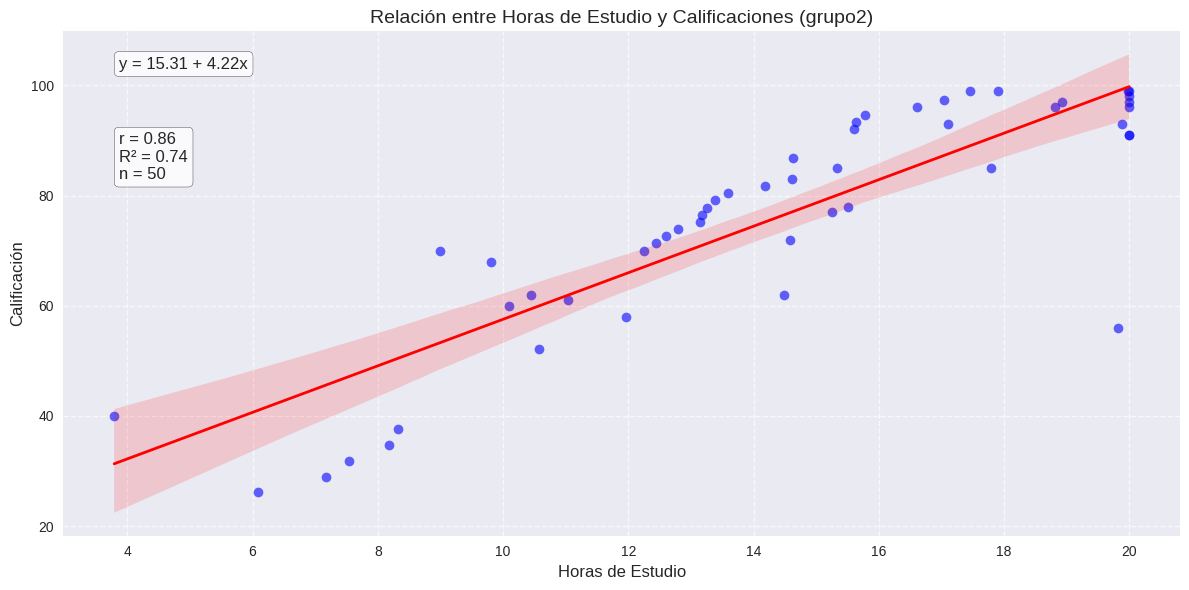

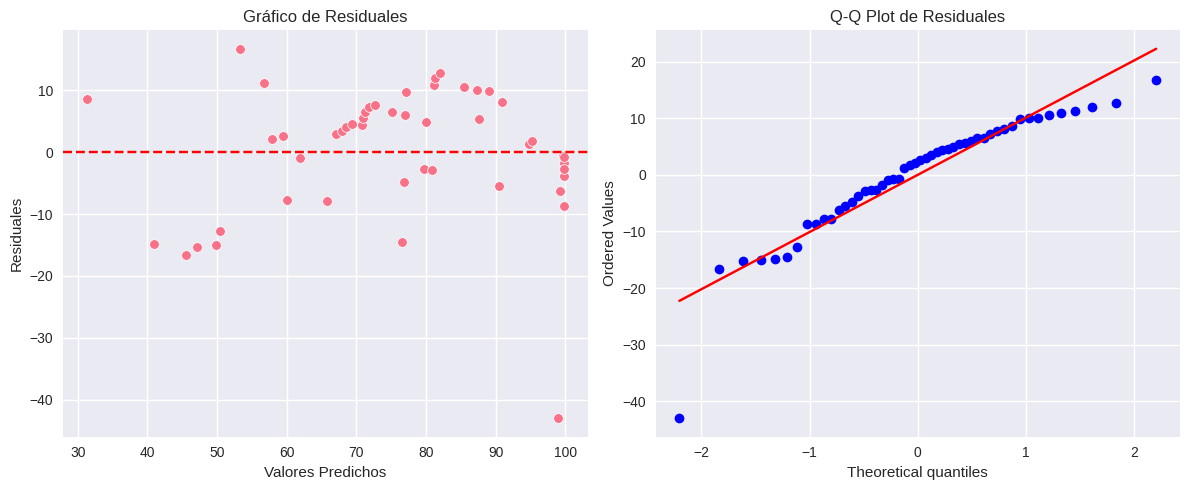

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
import seaborn as sns

from google.colab import files
uploaded = files.upload()

# Luego puedes leer el archivo así:
import io
data = pd.read_csv(io.BytesIO(uploaded['grupo2.csv']))
# Configuración de estilo para los gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Cargar los datos
try:
    data = pd.read_csv('grupo2.csv')

    # Verificar que las columnas esperadas existen
    if not all(col in data.columns for col in ['HorasEstudio', 'Calificacion']):
        raise ValueError("El archivo CSV no tiene las columnas esperadas")

    # Limpieza de datos (eliminar filas con valores faltantes si las hay)
    data = data.dropna()

    # Extraer las variables
    X = data['HorasEstudio'].values.reshape(-1, 1)  # Variable independiente
    y = data['Calificacion'].values                # Variable dependiente

    # 1. Análisis descriptivo básico
    print("\n--- Análisis Descriptivo ---")
    print(data.describe())

    # 2. Calcular el coeficiente de correlación de Pearson
    corr_coef, p_value = stats.pearsonr(data['HorasEstudio'], data['Calificacion'])
    print("\n--- Correlación ---")
    print(f"Coeficiente de correlación de Pearson: {corr_coef:.4f}")
    print(f"Valor p: {p_value:.4f}")

    # Interpretación de la correlación
    if abs(corr_coef) >= 0.7:
        strength = "fuerte"
    elif abs(corr_coef) >= 0.3:
        strength = "moderada"
    else:
        strength = "débil"

    direction = "positiva" if corr_coef > 0 else "negativa"
    print(f"Interpretación: Relación {strength} y {direction} entre horas de estudio y calificaciones.")

    # 3. Realizar la regresión lineal
    model = LinearRegression()
    model.fit(X, y)

    # Coeficientes de la regresión
    slope = model.coef_[0]
    intercept = model.intercept_
    print("\n--- Modelo de Regresión ---")
    print(f"Ecuación: Calificación = {intercept:.2f} + {slope:.2f} * HorasEstudio")

    # Calcular R²
    r_squared = model.score(X, y)
    print(f"Coeficiente de determinación (R²): {r_squared:.4f}")
    print(f"Esto significa que el {r_squared*100:.1f}% de la variación en las calificaciones se explica por las horas de estudio.")

    # 4. Crear gráficos
    plt.figure(figsize=(12, 6))

    # Gráfico de dispersión con línea de regresión
    sns.regplot(x='HorasEstudio', y='Calificacion', data=data,
                scatter_kws={'alpha':0.6, 'color':'blue'},
                line_kws={'color':'red', 'linewidth':2})

    # Añadir la ecuación de regresión
    equation = f'y = {intercept:.2f} + {slope:.2f}x'
    plt.text(0.05, 0.95, equation, transform=plt.gca().transAxes, fontsize=12,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # Añadir estadísticas importantes
    stats_text = f'r = {corr_coef:.2f}\nR² = {r_squared:.2f}\nn = {len(data)}'
    plt.text(0.05, 0.80, stats_text, transform=plt.gca().transAxes, fontsize=12,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # Configuración del gráfico
    plt.title('Relación entre Horas de Estudio y Calificaciones (grupo2)', fontsize=14)
    plt.xlabel('Horas de Estudio', fontsize=12)
    plt.ylabel('Calificación', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()

    # 5. Gráfico de residuales para verificar supuestos del modelo
    residuals = y - model.predict(X)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=model.predict(X), y=residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Gráfico de Residuales')
    plt.xlabel('Valores Predichos')
    plt.ylabel('Residuales')

    plt.subplot(1, 2, 2)
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title('Q-Q Plot de Residuales')

    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print("Error: No se encontró el archivo 'grupo2.csv'")
    print("Solución:")
    print("1. Verifica que el archivo existe y el nombre está correcto")
    print("2. Asegúrate que el archivo está en el mismo directorio que tu script")
    print("3. O proporciona la ruta completa al archivo")
except Exception as e:
    print(f"Ocurrió un error: {str(e)}")

#PREGUNTAS
 ¿Explicar cuál es la interpretación del coeficiente de regresión en términos de la
relación entre el tiempo de estudio y las calificaciones finales?
El coeficiente de regresión indica cuánto aumentan las calificaciones por cada hora adicional de estudio.
Por ejemplo, si la pendiente es 2.5, eso significa que por cada hora más de estudio, la calificación final sube en promedio 2.5 puntos. Representa el impacto directo del estudio en el rendimiento.

2. ¿Cómo se interpreta el coeficiente de correlación en términos de la fuerza y
dirección de la relación entre las variables?
El coeficiente de correlación de Pearson (r) mide la fuerza y dirección de la relación entre horas de estudio y calificaciones:

Si r es positivo, la relación es directa (más estudio, mejor calificación).

Su valor va de -1 a 1:

0.7 a 1.0 = relación fuerte

0.3 a 0.7 = moderada

0 a 0.3 = débil

Ejemplo: un r = 0.85 indica una relación fuerte y positiva.


3. ¿El modelo de regresión lineal es estadísticamente significativo?
Sí, si el valor p asociado al coeficiente de correlación es menor a 0.05, significa que la relación observada entre estudio y calificaciones no es por azar, sino que hay evidencia estadística de una relación real.


4. ¿Qué tan confiable es el modelo de regresión para predecir las
calificaciones finales de los estudiantes basado en el tiempo de estudio?
La confiabilidad se mide con el coeficiente de determinación (R²):

Indica qué porcentaje de la variación en las calificaciones se explica por las horas de estudio.

Ejemplo: R² = 0.80 significa que el 80% del rendimiento académico puede explicarse por el tiempo de estudio.

Si R² es alto (mayor a 0.7) y los residuales son estables, el modelo es bastante confiable para predecir calificaciones.



#Grupo 3

Saving grupo3.csv to grupo3.csv

--- Análisis Descriptivo ---
       HorasEstudio  Calificacion
count     50.000000     50.000000
mean      14.352000     75.968000
std        4.219174     23.668867
min        3.790000     15.000000
25%       12.032500     61.000000
50%       14.600000     84.950000
75%       17.715000     94.375000
max       20.000000     99.000000

--- Correlación ---
Coeficiente de correlación de Pearson: 0.9422
Valor p: 0.0000
Interpretación: Relación fuerte y positiva entre horas de estudio y calificaciones.

--- Modelo de Regresión ---
Ecuación: Calificación = 0.11 + 5.29 * HorasEstudio
Coeficiente de determinación (R²): 0.8878
Esto significa que el 88.8% de la variación en las calificaciones se explica por las horas de estudio.


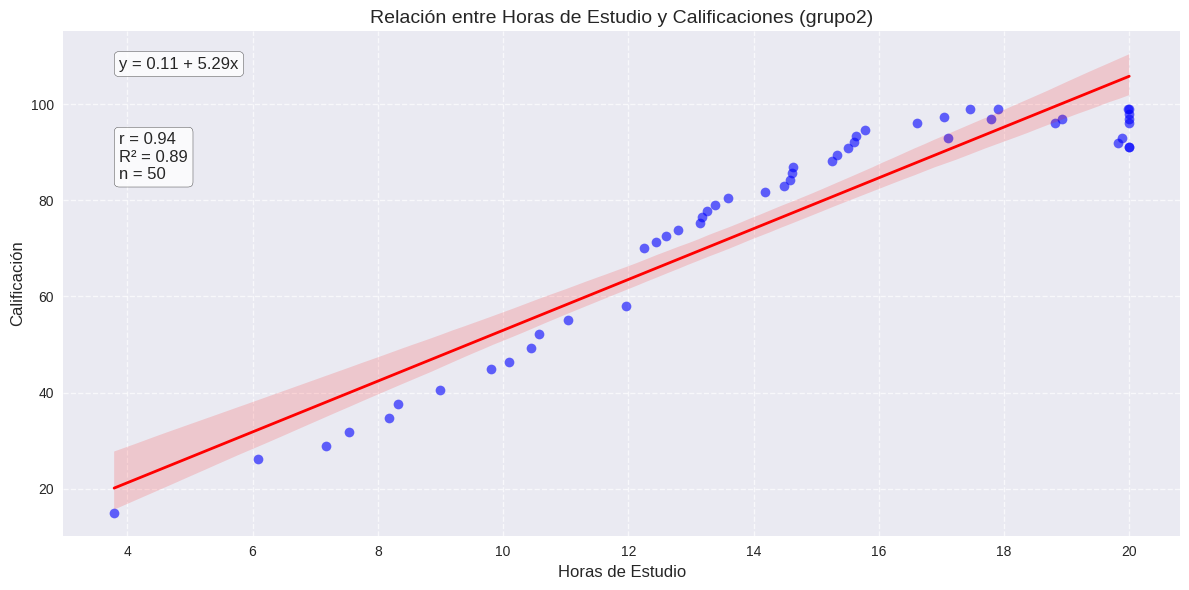

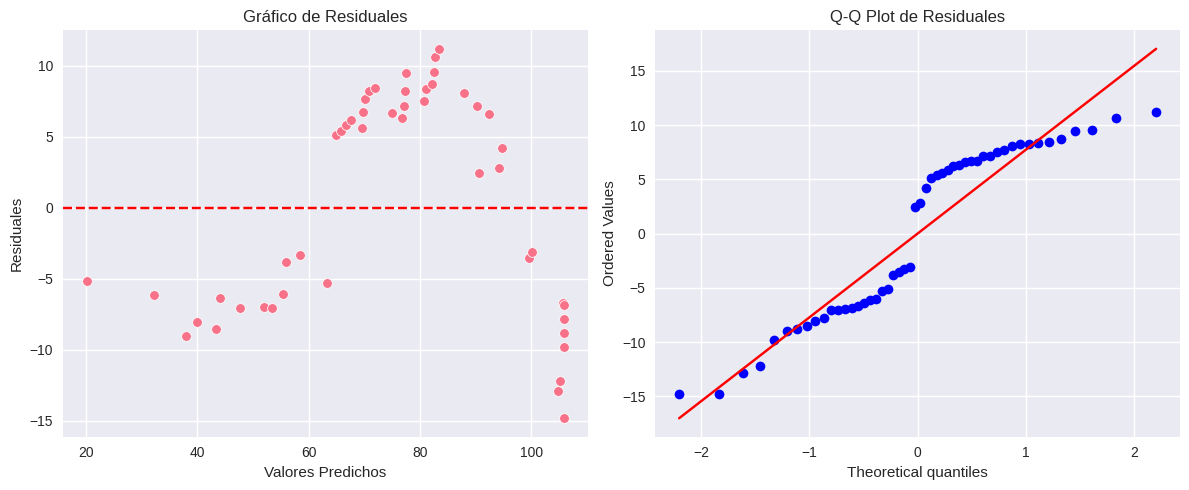

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
import seaborn as sns

from google.colab import files
uploaded = files.upload()

# Luego puedes leer el archivo así:
import io
data = pd.read_csv(io.BytesIO(uploaded['grupo3.csv']))
# Configuración de estilo para los gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Cargar los datos
try:
    data = pd.read_csv('grupo3.csv')

    # Verificar que las columnas esperadas existen
    if not all(col in data.columns for col in ['HorasEstudio', 'Calificacion']):
        raise ValueError("El archivo CSV no tiene las columnas esperadas")

    # Limpieza de datos (eliminar filas con valores faltantes si las hay)
    data = data.dropna()

    # Extraer las variables
    X = data['HorasEstudio'].values.reshape(-1, 1)  # Variable independiente
    y = data['Calificacion'].values                # Variable dependiente

    # 1. Análisis descriptivo básico
    print("\n--- Análisis Descriptivo ---")
    print(data.describe())

    # 2. Calcular el coeficiente de correlación de Pearson
    corr_coef, p_value = stats.pearsonr(data['HorasEstudio'], data['Calificacion'])
    print("\n--- Correlación ---")
    print(f"Coeficiente de correlación de Pearson: {corr_coef:.4f}")
    print(f"Valor p: {p_value:.4f}")

    # Interpretación de la correlación
    if abs(corr_coef) >= 0.7:
        strength = "fuerte"
    elif abs(corr_coef) >= 0.3:
        strength = "moderada"
    else:
        strength = "débil"

    direction = "positiva" if corr_coef > 0 else "negativa"
    print(f"Interpretación: Relación {strength} y {direction} entre horas de estudio y calificaciones.")

    # 3. Realizar la regresión lineal
    model = LinearRegression()
    model.fit(X, y)

    # Coeficientes de la regresión
    slope = model.coef_[0]
    intercept = model.intercept_
    print("\n--- Modelo de Regresión ---")
    print(f"Ecuación: Calificación = {intercept:.2f} + {slope:.2f} * HorasEstudio")

    # Calcular R²
    r_squared = model.score(X, y)
    print(f"Coeficiente de determinación (R²): {r_squared:.4f}")
    print(f"Esto significa que el {r_squared*100:.1f}% de la variación en las calificaciones se explica por las horas de estudio.")

    # 4. Crear gráficos
    plt.figure(figsize=(12, 6))

    # Gráfico de dispersión con línea de regresión
    sns.regplot(x='HorasEstudio', y='Calificacion', data=data,
                scatter_kws={'alpha':0.6, 'color':'blue'},
                line_kws={'color':'red', 'linewidth':2})

    # Añadir la ecuación de regresión
    equation = f'y = {intercept:.2f} + {slope:.2f}x'
    plt.text(0.05, 0.95, equation, transform=plt.gca().transAxes, fontsize=12,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # Añadir estadísticas importantes
    stats_text = f'r = {corr_coef:.2f}\nR² = {r_squared:.2f}\nn = {len(data)}'
    plt.text(0.05, 0.80, stats_text, transform=plt.gca().transAxes, fontsize=12,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # Configuración del gráfico
    plt.title('Relación entre Horas de Estudio y Calificaciones (grupo2)', fontsize=14)
    plt.xlabel('Horas de Estudio', fontsize=12)
    plt.ylabel('Calificación', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()

    # 5. Gráfico de residuales para verificar supuestos del modelo
    residuals = y - model.predict(X)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=model.predict(X), y=residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Gráfico de Residuales')
    plt.xlabel('Valores Predichos')
    plt.ylabel('Residuales')

    plt.subplot(1, 2, 2)
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title('Q-Q Plot de Residuales')

    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print("Error: No se encontró el archivo 'grupo2.csv'")
    print("Solución:")
    print("1. Verifica que el archivo existe y el nombre está correcto")
    print("2. Asegúrate que el archivo está en el mismo directorio que tu script")
    print("3. O proporciona la ruta completa al archivo")
except Exception as e:
    print(f"Ocurrió un error: {str(e)}")

#PREGUNTAS
1. ¿Explicar cuál es la interpretación del coeficiente de regresión en términos de la
relación entre el tiempo de estudio y las calificaciones finales?
El coeficiente de regresión (pendiente) indica cuánto cambian las calificaciones por cada hora adicional de estudio.
Por ejemplo, si la pendiente es 2.5, significa que:

Por cada hora más que un estudiante estudia, su calificación aumenta en promedio 2.5 puntos.

2. ¿Cómo se interpreta el coeficiente de correlación en términos de la fuerza y
dirección de la relación entre las variables?
El coeficiente de correlación de Pearson (r) mide la fuerza y dirección de la relación entre las variables:

Si r es positivo, la relación es directa: más estudio → mejor calificación.

Si r es cercano a 1, la relación es fuerte.

Si está entre 0.3 y 0.7, es moderada.

Si es menor a 0.3, es débil.

Ejemplo:

Si r = 0.85, hay una relación fuerte y positiva: más horas de estudio, mejores calificaciones.


3. ¿El modelo de regresión lineal es estadísticamente significativo?
í, si el valor p del coeficiente de correlación es menor a 0.05, se considera que el modelo es estadísticamente significativo.
Esto indica que:

La relación entre horas de estudio y calificación no es por azar y es válida en términos estadísticos.

4. ¿Qué tan confiable es el modelo de regresión para predecir las
calificaciones finales de los estudiantes basado en el tiempo de estudio?
La confiabilidad se evalúa con el coeficiente de determinación (R²):

Mide qué porcentaje de la variación en las calificaciones puede explicarse por las horas de estudio.

Por ejemplo:

Si R² = 0.78, entonces el 78% de la variación en las calificaciones se explica por el tiempo de estudio.